In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("Mumbai_House_Prices.csv")
df1.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [3]:
df1.shape

(76038, 9)

In [4]:
df1.columns

Index(['bhk', 'type', 'locality', 'area', 'price', 'price_unit', 'region',
       'status', 'age'],
      dtype='object')

In [5]:
df1.groupby('type')['type'].agg('count')

type
Apartment            74854
Independent House       73
Penthouse                3
Studio Apartment       882
Villa                  226
Name: type, dtype: int64

In [6]:
df1.locality.unique()

array(['Lak And Hanware The Residency Tower',
       'Radheya Sai Enclave Building No 2', 'Romell Serene', ...,
       'Ahuja Prasadam Phase III', 'HBS Marineview', 'Hubtown Serene'],
      dtype=object)

In [7]:
df1.region.unique()

array(['Andheri West', 'Naigaon East', 'Borivali West', 'Panvel',
       'Mira Road East', 'Parel', 'Boisar', 'Santacruz East',
       'Badlapur East', 'Fort', 'Badlapur West', 'Khopoli', 'Chembur',
       'Jogeshwari West', 'Vasai', 'Kalamboli', 'Powai', 'Ghansoli',
       'Thane West', 'Vikhroli', 'Bhiwandi', 'Airoli', 'Ambernath West',
       'Borivali East', 'Virar', 'Kharghar', 'Ulwe', 'Kamothe',
       'Jogeshwari East', 'Mulund West', 'Palghar', 'Goregaon West',
       'Taloja', 'Rasayani', 'Ghatkopar East', 'Ulhasnagar', 'Dombivali',
       'Kewale', 'Nala Sopara', 'Goregaon East', 'Kandivali East',
       'Kurla', 'Andheri East', 'Dahisar', 'Karanjade', 'Mahim', 'Vashi',
       'Malad West', 'Girgaon', 'Dadar West', 'Bandra West',
       'Kandivali West', 'Kalyan West', 'Neral', 'Kalyan East', 'Karjat',
       'Ghatkopar West', 'Dronagiri', 'Mulund East', 'Navade', 'Ambivali',
       'Agripada', 'Owale', 'Ville Parle East', 'Kalwa', 'Khar',
       'Santacruz West', 'Nerul', 'K

In [8]:
df2 = df1.drop(['locality', 'status'], axis = 1)
df2.head()

,bhk,type,area,price,price_unit,region,age
0,3,Apartment,685,2.50,Cr,Andheri West,New
1,2,Apartment,640,52.51,L,Naigaon East,New
2,2,Apartment,610,1.73,Cr,Borivali West,New
3,2,Apartment,876,59.98,L,Panvel,New
4,2,Apartment,659,94.11,L,Mira Road East,New


In [9]:
df2.shape

(76038, 7)

# Data Cleaning process

In [10]:
# Dropping null values if there are any
df2.isnull().sum()

bhk           0
type          0
area          0
price         0
price_unit    0
region        0
age           0
dtype: int64

In [11]:
#Checking unique columns for price_unit
df2.groupby('price_unit')['price_unit'].agg('count')

price_unit
Cr    40981
L     35057
Name: price_unit, dtype: int64

In [12]:
# Changing every price to lakhs
df2['price_lakhs'] = np.where(df2['price_unit'] == 'Cr', df2['price'] * 100, df2['price'])
df2.head()

,bhk,type,area,price,price_unit,region,age,price_lakhs
0,3,Apartment,685,2.50,Cr,Andheri West,New,250.00
1,2,Apartment,640,52.51,L,Naigaon East,New,52.51
2,2,Apartment,610,1.73,Cr,Borivali West,New,173.00
3,2,Apartment,876,59.98,L,Panvel,New,59.98
4,2,Apartment,659,94.11,L,Mira Road East,New,94.11


In [13]:
#Dropping price_unit and price because it doesn't matter
df3 = df2.drop(['price_unit','price'], axis = 'columns')
df3.head()

,bhk,type,area,region,age,price_lakhs
0,3,Apartment,685,Andheri West,New,250.00
1,2,Apartment,640,Naigaon East,New,52.51
2,2,Apartment,610,Borivali West,New,173.00
3,2,Apartment,876,Panvel,New,59.98
4,2,Apartment,659,Mira Road East,New,94.11


In [14]:
df3['bhk'].unique()

array([ 3,  2,  5,  1,  4,  6,  9,  8, 10,  7], dtype=int64)

In [15]:
df3.dtypes

bhk              int64
type            object
area             int64
region          object
age             object
price_lakhs    float64
dtype: object

In [16]:
# Adding price_per_sqft column

df4 = df3.copy()
df4['Price_per_sqft'] = df4['price_lakhs']*100000/df4['area']
df4.head()

,bhk,type,area,region,age,price_lakhs,Price_per_sqft
0,3,Apartment,685,Andheri West,New,250.00,36496.350365
1,2,Apartment,640,Naigaon East,New,52.51,8204.687500
2,2,Apartment,610,Borivali West,New,173.00,28360.655738
3,2,Apartment,876,Panvel,New,59.98,6847.031963
4,2,Apartment,659,Mira Road East,New,94.11,14280.728376


In [17]:
df4.age.unique()

array(['New', 'Resale', 'Unknown'], dtype=object)

In [18]:
df5 = df4.replace('Unknown', value = np.NaN)
df5.head()

,bhk,type,area,region,age,price_lakhs,Price_per_sqft
0,3,Apartment,685,Andheri West,New,250.00,36496.350365
1,2,Apartment,640,Naigaon East,New,52.51,8204.687500
2,2,Apartment,610,Borivali West,New,173.00,28360.655738
3,2,Apartment,876,Panvel,New,59.98,6847.031963
4,2,Apartment,659,Mira Road East,New,94.11,14280.728376


In [19]:
df5.isnull().sum()

bhk                   0
type                  0
area                  0
region                0
age               14609
price_lakhs           0
Price_per_sqft        0
dtype: int64

In [20]:
df6 = df5.dropna()
df6.shape

(61429, 7)

In [21]:
df6.isnull().sum()

bhk               0
type              0
area              0
region            0
age               0
price_lakhs       0
Price_per_sqft    0
dtype: int64

# Feature Engineering

In [22]:
len(df6.region.unique())

205

In [23]:
df6.region

0          Andheri West
1          Naigaon East
2         Borivali West
3                Panvel
4        Mira Road East
              ...      
76025        Thane West
76026        Thane West
76027        Thane West
76028        Thane West
76029        Thane West
Name: region, Length: 61429, dtype: object

In [24]:
df6.region = df6.region.apply(lambda x: x.strip())
region_stats = df6['region'].value_counts(ascending=False)
region_stats

Mira Road East         9759
Thane West             7857
Dombivali              2637
Kandivali East         2267
Kharghar               2028
                       ... 
Peddar Road               1
Kamathipura               1
Usarghar Gaon             1
Vevoor                    1
Pestom Sagar Colony       1
Name: region, Length: 205, dtype: int64

In [25]:
len(region_stats[region_stats>10])

109

In [26]:
len(region_stats[region_stats<=10])

96

In [27]:
region_stats_less_than_10 = region_stats[region_stats<=10]
region_stats_less_than_10

Kanjurmarg East        10
Sector 20 Kamothe      10
Saphale                10
Koproli                10
Dahisar West            9
                       ..
Peddar Road             1
Kamathipura             1
Usarghar Gaon           1
Vevoor                  1
Pestom Sagar Colony     1
Name: region, Length: 96, dtype: int64

In [28]:
df6.region = df6.region.apply(lambda x: 'other' if x in region_stats_less_than_10 else x)
len(df6.region.unique())

110

In [29]:
df6.head()

,bhk,type,area,region,age,price_lakhs,Price_per_sqft
0,3,Apartment,685,Andheri West,New,250.00,36496.350365
1,2,Apartment,640,Naigaon East,New,52.51,8204.687500
2,2,Apartment,610,Borivali West,New,173.00,28360.655738
3,2,Apartment,876,Panvel,New,59.98,6847.031963
4,2,Apartment,659,Mira Road East,New,94.11,14280.728376


In [30]:
df6.dtypes

bhk                 int64
type               object
area                int64
region             object
age                object
price_lakhs       float64
Price_per_sqft    float64
dtype: object

In [31]:
df6.shape

(61429, 7)

# Data visualization and Outlier Detection

In [32]:
# Removing rows which don't fit the threshold of area/bhk
df7 = df6
df7[ df7.area / df7.bhk < 250 ].head()

,bhk,type,area,region,age,price_lakhs,Price_per_sqft
0,3,Apartment,685,Andheri West,New,250.0,36496.350365
49,3,Apartment,685,Andheri West,New,250.0,36496.350365
131,2,Apartment,486,Badlapur East,New,36.0,7407.407407
132,2,Apartment,486,Badlapur East,New,36.0,7407.407407
457,2,Studio Apartment,415,Girgaon,Resale,95.0,22891.566265


In [33]:
df8 = df7[ ~(df7.area / df7.bhk < 250)]
df8.shape

(60507, 7)

In [34]:
df8.Price_per_sqft.describe()

count     60507.000000
mean      15131.002928
std        9643.238521
min         646.766169
25%        8349.349349
50%       12543.554007
75%       19921.619020
max      125000.000000
Name: Price_per_sqft, dtype: float64

In [35]:
df8.shape

(60507, 7)

In [36]:
# Removing price_per_sqft outliers

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('region'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[ ( subdf.Price_per_sqft > (m - 2*st) ) & ( subdf.Price_per_sqft <= (m + 2*st) ) ]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [37]:
#plt.hist(np.log(df8.Price_per_sqft), rwidth = 0.8)
#plt.xlabel('Price per sqft')
#plt.ylabel('Count')

In [38]:
df9 = remove_pps_outliers(df8)
df9.shape

(57859, 7)

In [39]:
numerical_features = ['Price_per_sqft', 'price_lakhs', 'bhk', 'area' ]

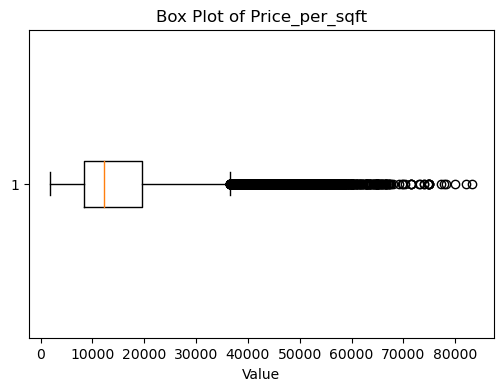

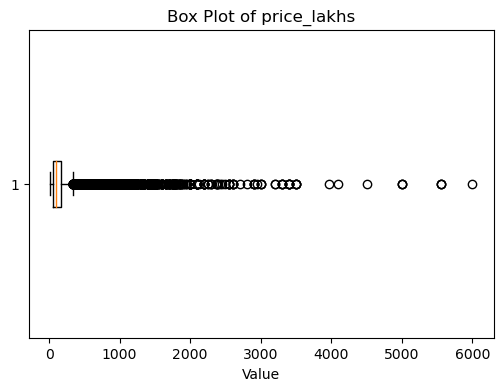

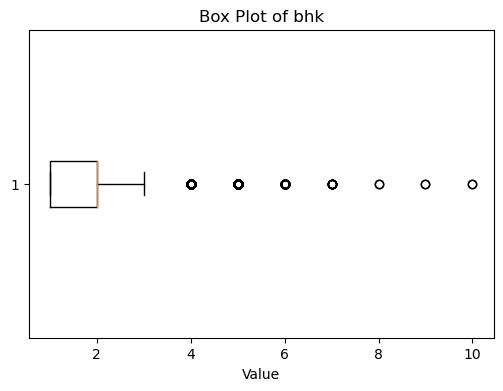

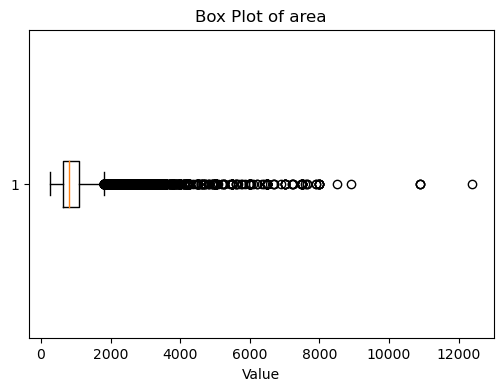

In [40]:
for column in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df9[column], vert = False, boxprops=dict())
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Value')
    plt.show()

In [41]:
df9['region'].unique()

array(['Agripada', 'Airoli', 'Ambernath East', 'Ambernath West',
       'Andheri East', 'Andheri West', 'Anjurdive', 'Badlapur East',
       'Badlapur West', 'Bandra East', 'Bandra Kurla Complex',
       'Bandra West', 'Belapur', 'Bhandup East', 'Bhandup West',
       'Bhayandar East', 'Bhayandar West', 'Bhiwandi', 'Boisar',
       'Borivali East', 'Borivali West', 'Byculla', 'Chembur', 'Colaba',
       'Dadar East', 'Dadar West', 'Dahisar', 'Deonar', 'Diva',
       'Dombivali', 'Dronagiri', 'Ghansoli', 'Ghatkopar East',
       'Ghatkopar West', 'Girgaon', 'Goregaon East', 'Goregaon West',
       'Jogeshwari East', 'Jogeshwari West', 'Juhu', 'Juinagar',
       'Kalamboli', 'Kalwa', 'Kalyan East', 'Kalyan West', 'Kamothe',
       'Kandivali East', 'Kandivali West', 'Kanjurmarg', 'Karanjade',
       'Karjat', 'Kasheli', 'Khar', 'Kharghar', 'Khopoli',
       'Koper Khairane', 'Kurla', 'Lower Parel', 'Mahalaxmi', 'Mahim',
       'Malad East', 'Malad West', 'Marine Lines', 'Matunga', 'Mazag

In [42]:
df10 = df9.copy()
df10.head()

,bhk,type,area,region,age,price_lakhs,Price_per_sqft
0,2,Apartment,650,Agripada,Resale,262.0,40307.692308
1,3,Apartment,1300,Agripada,New,750.0,57692.307692
2,1,Apartment,803,Agripada,Resale,225.0,28019.925280
3,2,Apartment,825,Agripada,Resale,140.0,16969.696970
4,1,Apartment,684,Agripada,Resale,170.0,24853.801170


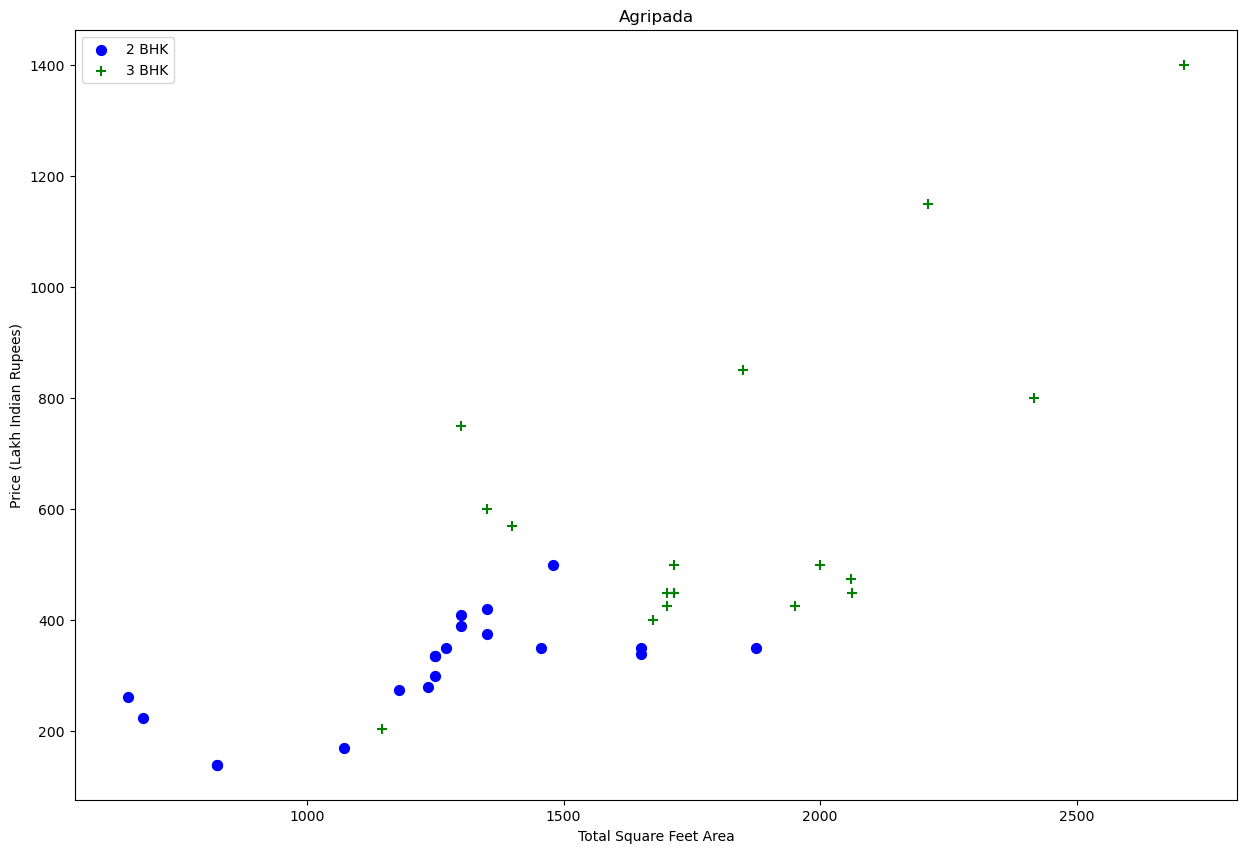

In [43]:
import matplotlib.pyplot as plt
import matplotlib

def chart(df, region):
    bhk2 = df[(df.region == region) & (df.bhk == 2)]
    bhk3 = df[(df.region == region) & (df.bhk == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    
    plt.scatter(bhk2.area, bhk2.price_lakhs, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.area, bhk3.price_lakhs, marker='+', color='green', label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(region)
    plt.legend()

chart(df10, "Agripada")
plt.show()

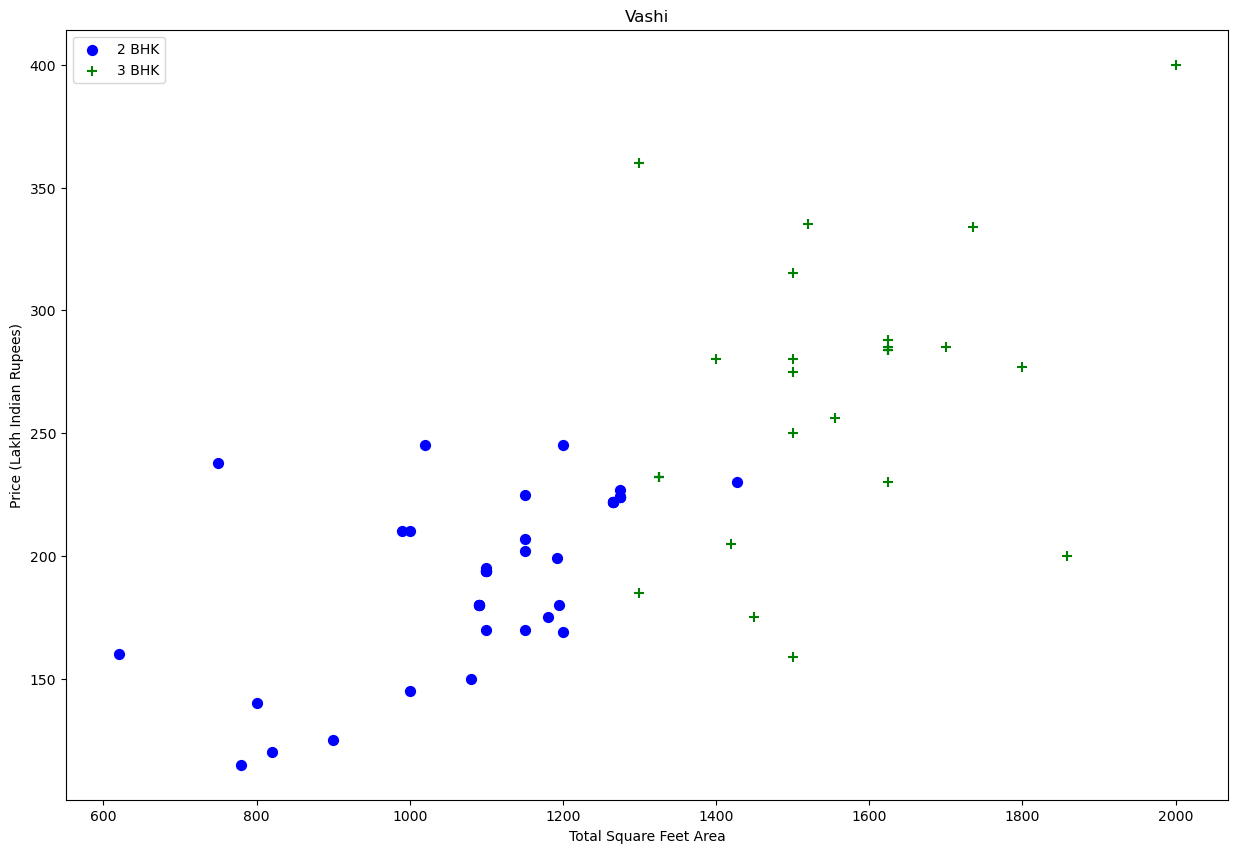

In [44]:
chart(df10,'Vashi')

In [45]:
df10.head()
df10.shape

(57859, 7)

In [46]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for region, region_df in df.groupby('region'):
        global bhk_stats
        bhk_stats = {}
        for bhk, bhk_df in region_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_per_sqft),
                'std': np.std(bhk_df.Price_per_sqft),
                'count': bhk_df.shape[0]
                
            }
        for bhk, bhk_df in region_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [47]:
df11 = remove_bhk_outliers(df10)
print(df11.shape)

(41955, 7)


In [48]:
bhk_stats

{1: {'mean': 8741.604639291218, 'std': 5219.209597150165, 'count': 153},
 2: {'mean': 8844.322386583643, 'std': 4682.912355110132, 'count': 81},
 3: {'mean': 14110.059708392266, 'std': 4572.753961012929, 'count': 34},
 4: {'mean': 8489.795918367347, 'std': 5784.484052846187, 'count': 3}}

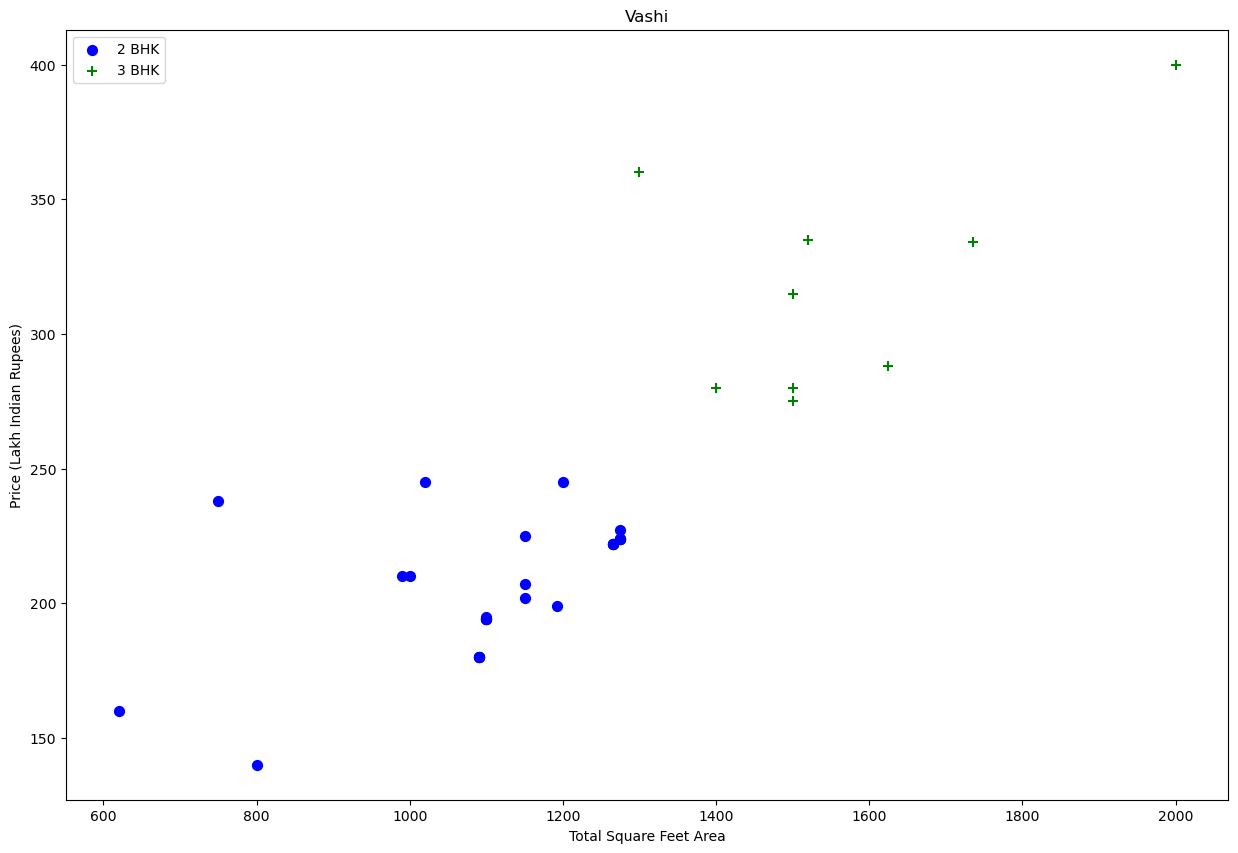

In [49]:
chart(df11,'Vashi')

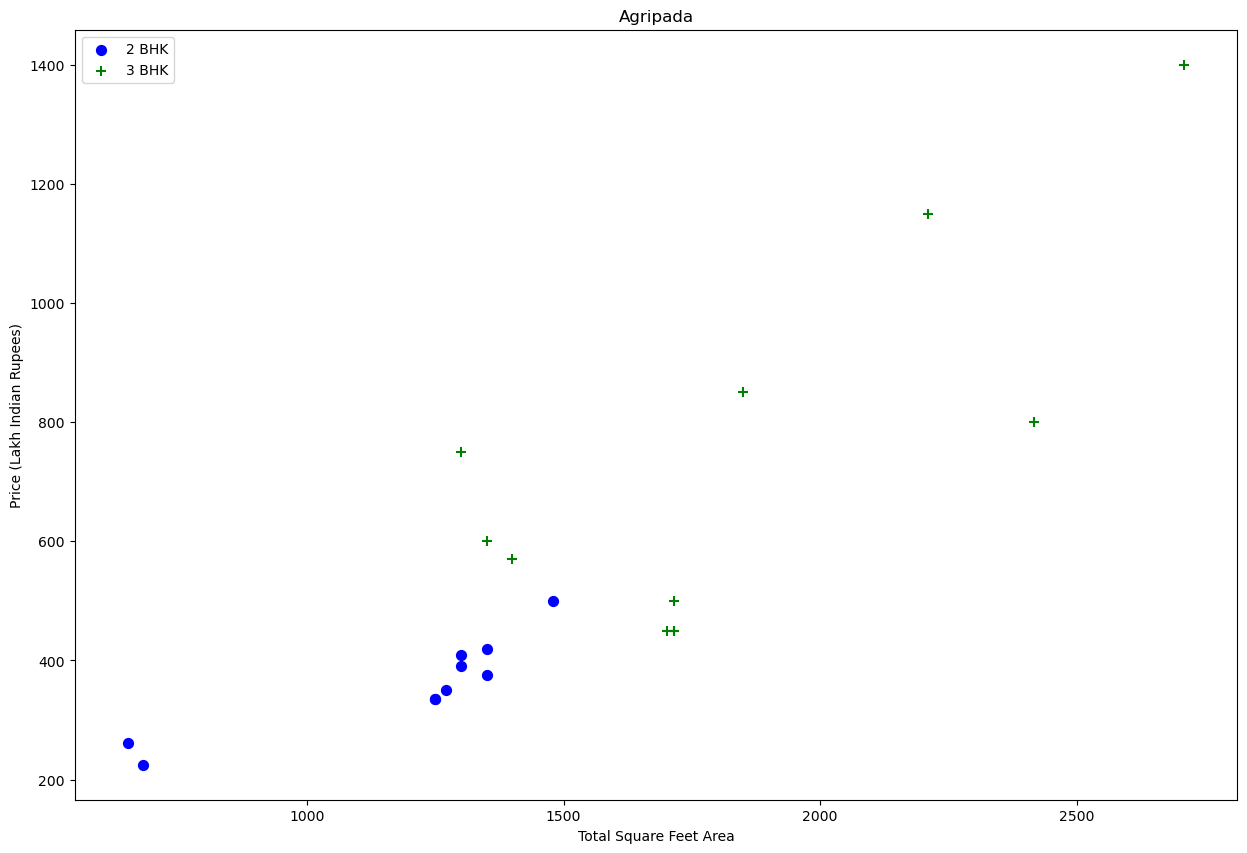

In [50]:
chart(df11,'Agripada')

In [51]:
df11.head()

,bhk,type,area,region,age,price_lakhs,Price_per_sqft
0,2,Apartment,650,Agripada,Resale,262.0,40307.692308
1,3,Apartment,1300,Agripada,New,750.0,57692.307692
2,1,Apartment,803,Agripada,Resale,225.0,28019.925280
4,1,Apartment,684,Agripada,Resale,170.0,24853.801170
5,1,Apartment,545,Agripada,Resale,160.0,29357.798165


In [52]:
#Dropping price_per_sqft column

df12 = df11.drop(['Price_per_sqft','type','age'],axis='columns')
df12.head()

,bhk,area,region,price_lakhs
0,2,650,Agripada,262.0
1,3,1300,Agripada,750.0
2,1,803,Agripada,225.0
4,1,684,Agripada,170.0
5,1,545,Agripada,160.0


# One hot encoding

In [53]:
dummies = pd.get_dummies(df12.region)
dummies.head(20)

,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,Badlapur East,Badlapur West,Bandra East,...,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Avoiding dummy variable trap for categorical featue 'region'
df13 = pd.concat([df12,dummies.drop('other',axis='columns')],axis='columns')
df13.head()

,bhk,area,region,price_lakhs,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,650,Agripada,262.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1300,Agripada,750.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,803,Agripada,225.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,684,Agripada,170.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,545,Agripada,160.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df14 = df13.drop('region',axis='columns')
df14.head()

,bhk,area,price_lakhs,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,650,262.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1300,750.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,803,225.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,684,170.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,545,160.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df14.shape

(41955, 112)

# Model Training using Linear Regression

In [85]:
y = df14['price_lakhs']
y.shape

(41955,)

In [86]:
log_transform_y = np.log(y)

In [87]:
y.head()

0    262.0
1    750.0
2    225.0
4    170.0
5    160.0
Name: price_lakhs, dtype: float64

In [88]:
X = df14.drop(['price_lakhs'],axis='columns')
X.head()

,bhk,area,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,Badlapur East,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,650,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1300,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,803,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,684,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,545,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
X.shape

(41955, 111)

In [90]:
import statsmodels.api as sm
from scipy.stats import f_oneway
import scipy.stats 

X_scaled = sm.add_constant(X)

model = sm.OLS(y, X_scaled).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            price_lakhs   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1999.
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        00:50:35   Log-Likelihood:            -2.4430e+05
No. Observations:               41955   AIC:                         4.888e+05
Df Residuals:                   41843   BIC:                         4.898e+05
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -144.3647 

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, log_transform_y, test_size=0.2, random_state=10)

In [97]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9082117090956838

In [98]:
y_pred = lr_clf.predict(X_test)

In [149]:
cdf = pd.DataFrame(data = lr_clf.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
bhk,0.401609
area,0.000404
Agripada,1.221451
Airoli,0.361725
Ambernath East,-0.599761
...,...
Ville Parle West,1.326262
Virar,-0.406601
Virar West,-0.819902
Wadala,1.048600


In [100]:
df = pd.DataFrame({'Actual': np.round(y_test, 2), 'Predicted': np.round(y_pred, 2)})
df.head(10)

,Actual,Predicted
11558,4.11,4.06
23106,3.83,4.15
11771,3.85,3.78
47100,4.74,4.65
41789,5.74,5.56
39616,5.89,5.79
17905,4.06,4.48
44079,4.39,4.71
29843,4.15,4.07
7641,5.87,5.81


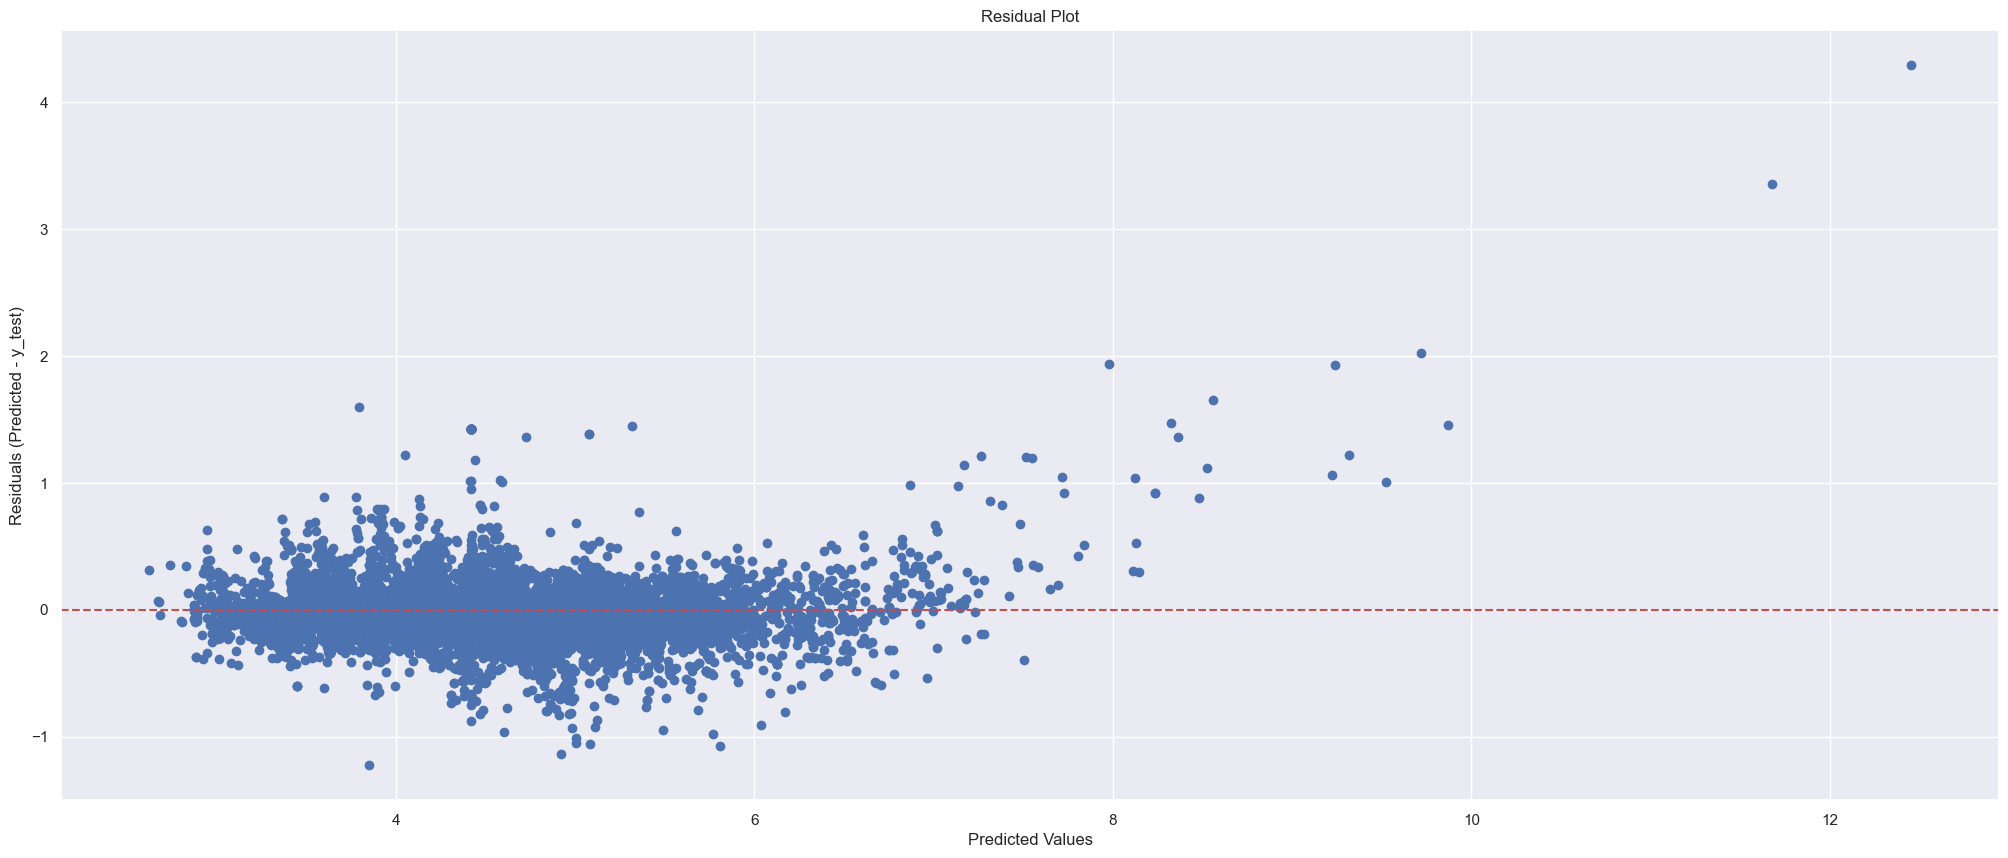

In [150]:
residuals = y_pred - y_test
plt.figure(figsize=(25,10))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Predicted - y_test)')
plt.title('Residual Plot')
plt.show()

Text(0.5, 1.0, 'y-test vs y-predicted values')

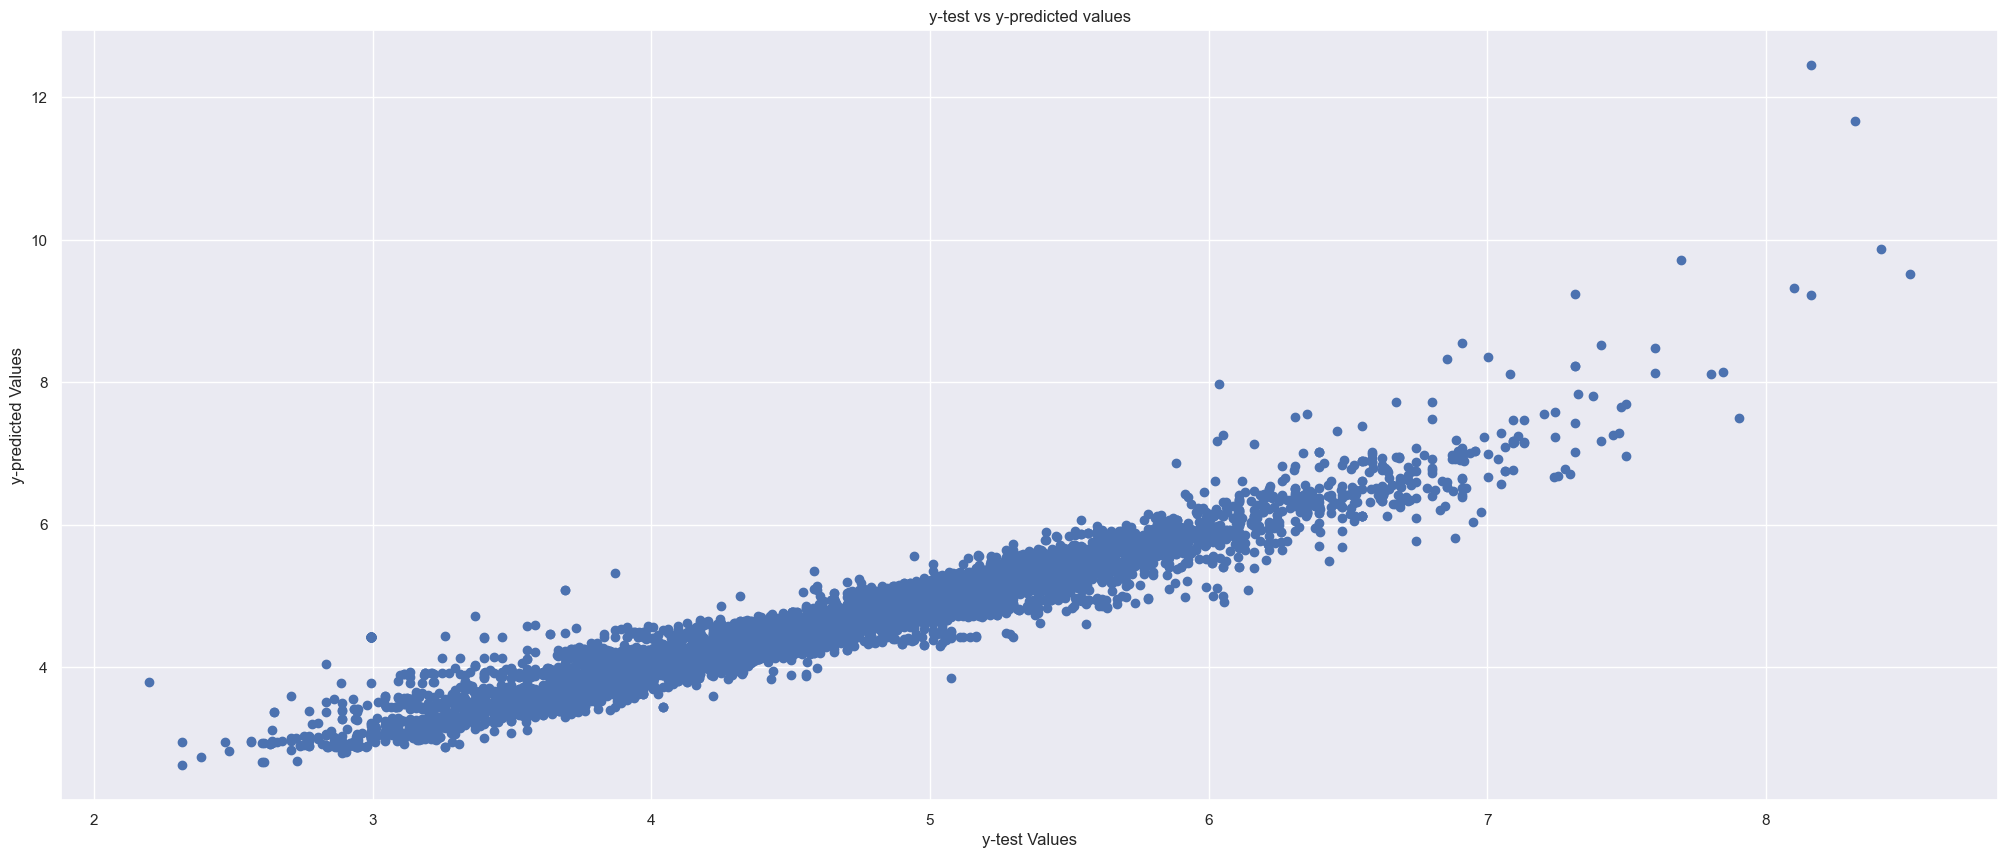

In [101]:
plt.figure(figsize=(25,10))
plt.scatter(y_test, y_pred)
plt.xlabel('y-test Values')
plt.ylabel('y-predicted Values')
plt.title('y-test vs y-predicted values')

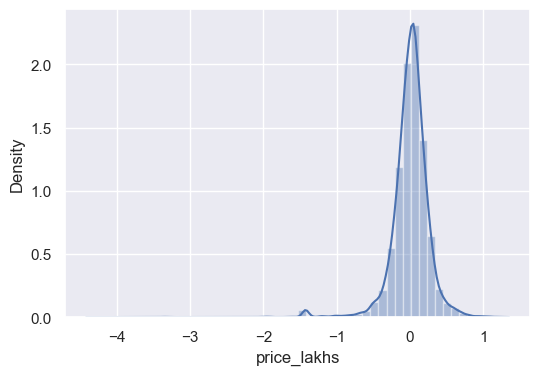

In [102]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(6,4)})
ax = sns.distplot((y_test-y_pred))

In [103]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=cv)

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.84657313 0.83606213 0.83661126 0.81456392 0.83260101]
Mean score: 0.8332822888223234
Standard deviation: 0.010452725505574917


# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }    
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

ans = find_best_model_using_gridsearchcv(X_train,y_train)

In [72]:
pd.set_option('display.max_colwidth', None)
ans.head()

,model,best_score,best_params
0,linear_regression,0.826643,"{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}"
1,lasso,0.697086,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.899581,"{'criterion': 'squared_error', 'splitter': 'random'}"


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVR(gamma='auto'))
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
ans2 = pd.DataFrame({'Actual': np.round(y_test, 2), 'Predicted': np.round(y_pred, 2)})

In [ ]:
ans2.head()

# TheilSenRegressor

In [ ]:
from sklearn.linear_model import TheilSenRegressor
reg = TheilSenRegressor(random_state=0).fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
print(y_pred)

In [ ]:
ans3 = pd.DataFrame({'Actual': np.round(y_test, 2), 'Predicted': np.round(y_pred, 2)})

In [ ]:
ans3.head()

# Huber Regressor

In [ ]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(max_iter = 1000).fit(X_train, y_train)

In [ ]:
huber.score(X_train, y_train)

In [ ]:
y_pred = huber.predict(X_test)

In [ ]:
print(y_pred)

In [ ]:
ans4 = pd.DataFrame({'Actual': np.round(y_test, 2), 'Predicted': np.round(y_pred, 2)})

In [ ]:
ans4.head()

# Setting a predict_price function

In [ ]:
location='Agripada'
np.where(X.columns==location)[0][0]

In [105]:
def predict_price(location,sqft,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    if loc_index >= 0:
        x[loc_index] = 1
        
    return np.exp(lr_clf.predict([x])[0])

In [113]:
predict_price('Agripada',900, 2)

280.3190133011406

In [116]:
predict_price('Agripada',500, 1)

159.57694048291918

In [114]:
predict_price('Andheri West',900, 2)

137.26765332655953

In [145]:
predict_price('Kandivali East',900, 1)

113.00000000000003

In [146]:
predict_price('Kandivali East',1200, 2)

232.14935676258634

In [119]:
predict_price('Andheri West',1800, 3)

295.1773955994232

In [120]:
predict_price('Airoli',1233, 4)

303.1152714321059

In [125]:
dtr_clf = DecisionTreeRegressor(criterion = 'squared_error', splitter = 'random')
dtr_clf.fit(X_train,y_train)
dtr_clf.score(X_test,y_test)

0.9498160046427129

In [126]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
model = DecisionTreeRegressor(criterion = 'squared_error', splitter = 'random')

scores = cross_val_score(model, X, y, cv = cv)

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.90973421 0.94073396 0.92866369 0.86491147 0.91700172]
Mean score: 0.9122090102976032
Standard deviation: 0.02588660530570872


In [132]:
def predict_price(location,sqft,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    if loc_index >= 0:
        x[loc_index] = 1
        
    return np.exp(dtr_clf.predict([x])[0])

In [133]:
predict_price('Agripada',600, 2)

138.99999999999997

In [134]:
predict_price('Andheri West',600, 2)

136.53758420876358

In [137]:
predict_price('Borivali West',600, 2)

138.99999999999997

In [138]:
predict_price('Virar',600, 2)

45.03000000000001

In [140]:
predict_price('Vashi',600, 2)

138.99999999999997

In [144]:
predict_price('Worli',1700, 4)

900.0000000000001

In [135]:
predict_price('Andheri West',800, 3)

295.95719555825514

In [136]:
predict_price('Airoli',1233, 4)

254.99999999999991